In [0]:
!wget https://www.dropbox.com/s/n8bninud94blch4/fer2013.csv

In [0]:
import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split 
dataset_path = 'fer2013.csv'
image_size=(48,48)

In [0]:
def load_fer2013():
    data = pd.read_csv(dataset_path)
    pixels = data['pixels'].tolist()
    width, height = 48, 48
    faces = []
    for pixel_sequence in pixels:
        face = [int(pixel) for pixel in pixel_sequence.split(' ')]
        face = np.asarray(face).reshape(width, height)
        face = cv2.resize(face.astype('uint8'),image_size)
        faces.append(face.astype('float32'))
    faces = np.asarray(faces)
    faces = np.expand_dims(faces, -1)
    emotions = pd.get_dummies(data['emotion']).as_matrix()
    return faces, emotions

In [0]:
def preprocess_input(x, v2=True):
    x = x.astype('float32')
    x = x / 255.0
    if v2:
        x = x - 0.5
        x = x * 2.0
    return x

In [0]:
faces, emotions = load_fer2013()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


In [0]:
faces = preprocess_input(faces)

In [0]:
xtrain, xtest,ytrain,ytest = train_test_split(faces, emotions,test_size=0.2,shuffle=True)

In [0]:
print('xtrain, xtest,ytrain,ytest',xtrain.shape, xtest.shape,ytrain.shape,ytest.shape)

xtrain, xtest,ytrain,ytest (28709, 48, 48, 1) (7178, 48, 48, 1) (28709, 7) (7178, 7)


In [0]:
from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.layers import Activation, Conv2D, Dropout,Dense
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import SeparableConv2D
from keras import layers
from keras.regularizers import l2
import pandas as pd
import cv2
import numpy as np

In [0]:
# parameters
batch_size = 64
num_epochs = 20
input_shape = (48, 48, 1)
verbose = 1
num_classes = 7
patience = 50
base_path = 'models/'
l2_regularization=0.01

In [0]:
# data generator
data_generator = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True)

In [0]:
# model parameters
regularization = l2(l2_regularization)

In [0]:
#desinging the CNN
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=input_shape, data_format='channels_last', kernel_regularizer=regularization))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 44, 44, 64)        1664      
_________________________________________________________________
batch_normalization_4 (Batch (None, 44, 44, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 22, 22, 64)        0         
Total params: 1,920
Trainable params: 1,792
Non-trainable params: 128
_________________________________________________________________


In [0]:
#desinging the CNN
model.add(Conv2D(128, kernel_size=(5, 5), activation='relu', input_shape=input_shape, data_format='channels_last', kernel_regularizer=regularization))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 44, 44, 64)        1664      
_________________________________________________________________
batch_normalization_4 (Batch (None, 44, 44, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 18, 18, 128)       204928    
_________________________________________________________________
batch_normalization_5 (Batch (None, 18, 18, 128)       512       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 9, 9, 128)        

In [0]:
#desinging the CNN
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=input_shape, data_format='channels_last', kernel_regularizer=regularization))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 44, 44, 64)        1664      
_________________________________________________________________
batch_normalization_4 (Batch (None, 44, 44, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 18, 18, 128)       204928    
_________________________________________________________________
batch_normalization_5 (Batch (None, 18, 18, 128)       512       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 9, 9, 128)        

In [0]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 44, 44, 64)        1664      
_________________________________________________________________
batch_normalization_4 (Batch (None, 44, 44, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 18, 18, 128)       204928    
_________________________________________________________________
batch_normalization_5 (Batch (None, 18, 18, 128)       512       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 9, 9, 128)        

In [0]:
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

In [0]:
#Compliling the model with adam optimixer and categorical crossentropy loss
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])

In [0]:
#training the model
model.fit(np.array(xtrain), np.array(ytrain),
          batch_size=batch_size,
          epochs=num_epochs,
          verbose=1,
          shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
28709/28709 [==============================] - 486s 17ms/step - loss: 3.2649 - acc: 0.3053
Epoch 2/20
28709/28709 [==============================] - 484s 17ms/step - loss: 2.1210 - acc: 0.4031
Epoch 3/20
28709/28709 [==============================] - 482s 17ms/step - loss: 2.0157 - acc: 0.4354
Epoch 4/20
28709/28709 [==============================] - 480s 17ms/step - loss: 2.0001 - acc: 0.4512
Epoch 5/20
28709/28709 [==============================] - 480s 17ms/step - loss: 2.0064 - acc: 0.4646
Epoch 6/20
28709/28709 [==============================] - 479s 17ms/step - loss: 1.9777 - acc: 0.4672
Epoch 7/20
28709/28709 [==============================] - 479s 17ms/step - loss: 1.9691 - acc: 0.4724
Epoch 8/20
28709/28709 [==============================] - 478s 17ms/step - loss: 1.9983 - acc: 0.4742
Epoch 9/20
28709/28709 [==============================] - 479s 17ms/step - loss: 1.9396 

In [0]:
!pip install jsonlib

     |████████████████████████████████| 51kB 1.7MB/s 
  ERROR: Failed building wheel for jsonlib
  Running setup.py clean for jsonlib
Failed to build jsonlib
    Running setup.py install for jsonlib ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-5g85ta0j/jsonlib/setup.py'"'"'; __file__='"'"'/tmp/pip-install-5g85ta0j/jsonlib/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-ekk0w9me/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.


In [0]:
import json
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [0]:
model.save_weights('external.h5')
print("[INFO] Saved model to disk")

[INFO] Saved model to disk


In [0]:
from keras.models import model_from_json
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("external.h5")
print("Loaded model from disk")
# load the model we saved

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])

Loaded model from disk
[6 0 4 ... 0 3 3]


In [0]:
len(clas)

7178

In [0]:
clas[4]

6

In [0]:
len(ytest)

7178

In [0]:
np.argmax(ytest[4]

array([1, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [0]:
# Look at confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

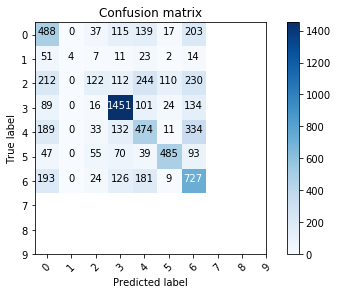

In [0]:
# Predict the values from the validation dataset
Y_pred = model.predict(xtest)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(ytest,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))